In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from pylab import figure, axes, pie, title, savefig
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/hamin/Documents/bithumb_analysis/include/2018-05-btc-krw.csv")

In [3]:
# identifying column type 
df.dtypes

timestamp     object
quantity     float64
price          int64
fee            int64
amount         int64
side           int64
dtype: object

In [4]:
# creating 'price - amount' connection - price가 같은것 끼리 묶는다.
amount_price = df['amount'].groupby(df['price'])

In [5]:
# price 별 amount의 평균
amount_price.mean()

price
7853000    -1.405690e+05
7858000     1.982837e+05
7859000    -1.206985e+07
7862000     1.392675e+06
7864000    -6.849545e+05
                ...     
10947000    1.970500e+04
10948000    4.379200e+06
10949000    1.780308e+06
10951000   -8.343020e+06
10953000    2.173622e+06
Name: amount, Length: 2749, dtype: float64

In [6]:
# 가격을 10 구간 으로 구간 나눔
factor_price=pd.cut(df.price,10)

In [7]:
factor_price

0        (10023000.0, 10333000.0]
1        (10023000.0, 10333000.0]
2        (10023000.0, 10333000.0]
3        (10023000.0, 10333000.0]
4        (10023000.0, 10333000.0]
                   ...           
23290      (8163000.0, 8473000.0]
23291      (8163000.0, 8473000.0]
23292      (8163000.0, 8473000.0]
23293      (8163000.0, 8473000.0]
23294      (8163000.0, 8473000.0]
Name: price, Length: 23295, dtype: category
Categories (10, interval[float64]): [(7849900.0, 8163000.0] < (8163000.0, 8473000.0] < (8473000.0, 8783000.0] < (8783000.0, 9093000.0] ... (9713000.0, 10023000.0] < (10023000.0, 10333000.0] < (10333000.0, 10643000.0] < (10643000.0, 10953000.0]]

In [8]:
group_amount_by_priceGroup = df['amount'].groupby(factor_price)

In [9]:
group_amount_by_priceGroup.size()

price
(7849900.0, 8163000.0]       865
(8163000.0, 8473000.0]      2012
(8473000.0, 8783000.0]       451
(8783000.0, 9093000.0]      1535
(9093000.0, 9403000.0]      5297
(9403000.0, 9713000.0]      3755
(9713000.0, 10023000.0]     2686
(10023000.0, 10333000.0]    2525
(10333000.0, 10643000.0]    2887
(10643000.0, 10953000.0]    1282
Name: amount, dtype: int64

In [10]:
group_amount_by_priceGroup.mean()

price
(7849900.0, 8163000.0]       -336.387283
(8163000.0, 8473000.0]       -975.011431
(8473000.0, 8783000.0]     -29993.463415
(8783000.0, 9093000.0]     -78418.174593
(9093000.0, 9403000.0]       3178.292996
(9403000.0, 9713000.0]      72006.282024
(9713000.0, 10023000.0]    -53587.653760
(10023000.0, 10333000.0]   -92779.711287
(10333000.0, 10643000.0]    61137.858330
(10643000.0, 10953000.0]    48855.038222
Name: amount, dtype: float64

In [11]:
group_amount_by_priceGroup.sum()

price
(7849900.0, 8163000.0]        -290975
(8163000.0, 8473000.0]       -1961723
(8473000.0, 8783000.0]      -13527052
(8783000.0, 9093000.0]     -120371898
(9093000.0, 9403000.0]       16835418
(9403000.0, 9713000.0]      270383589
(9713000.0, 10023000.0]    -143936438
(10023000.0, 10333000.0]   -234268771
(10333000.0, 10643000.0]    176504997
(10643000.0, 10953000.0]     62632159
Name: amount, dtype: int64

In [12]:
group_amount_by_priceGroup_table = [group_amount_by_priceGroup.size(), group_amount_by_priceGroup.mean(), group_amount_by_priceGroup.sum()]
amount_by_priceGroup = reduce(lambda left, right: pd.merge(left,right, on='price'), group_amount_by_priceGroup_table)
amount_by_priceGroup.columns = ["# of amount", "mean of amount", "sum of amount"]

In [13]:
amount_by_priceGroup

,# of amount,mean of amount,sum of amount
price,,,
"(7849900.0, 8163000.0]",865,-336.387283,-290975
"(8163000.0, 8473000.0]",2012,-975.011431,-1961723
"(8473000.0, 8783000.0]",451,-29993.463415,-13527052
"(8783000.0, 9093000.0]",1535,-78418.174593,-120371898
"(9093000.0, 9403000.0]",5297,3178.292996,16835418
"(9403000.0, 9713000.0]",3755,72006.282024,270383589
"(9713000.0, 10023000.0]",2686,-53587.653760,-143936438
"(10023000.0, 10333000.0]",2525,-92779.711287,-234268771
"(10333000.0, 10643000.0]",2887,61137.858330,176504997


In [14]:
amount_by_priceGroup.to_csv("/Users/hamin/Documents/bithumb_analysis/table/amount_by_price_Group.csv")

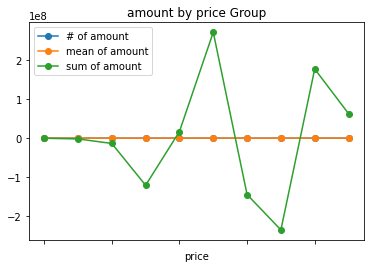

In [15]:
# priceGroup-amount 간 그래프
amount_by_priceGroup.plot(title='amount by price Group', marker='o')
plt.savefig('/Users/hamin/Documents/bithumb_analysis/graph/amount_by_price_Group.png', dpi=300)

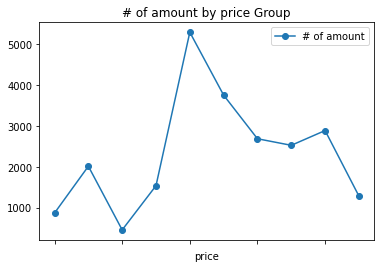

In [16]:
# priceGroup-# of amount 간 그래프
amount_by_priceGroup.plot(y='# of amount',title='# of amount by price Group', marker='o')
plt.savefig('/Users/hamin/Documents/bithumb_analysis/graph/#_of_amount_by_price_Group.png', dpi=300)

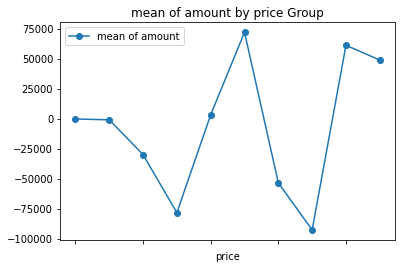

In [17]:
# priceGroup-mean of amount 간 그래프
amount_by_priceGroup.plot(y='mean of amount',title='mean of amount by price Group', marker='o')
plt.savefig('/Users/hamin/Documents/bithumb_analysis/graph/mean_of_amount_by_price_Group.png', dpi=300)

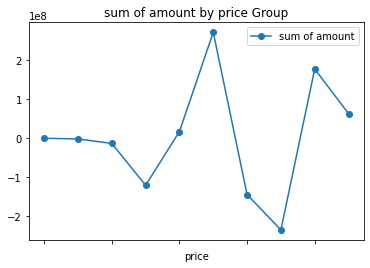

In [18]:
# priceGroup-sum of amount 간 그래프
amount_by_priceGroup.plot(y='sum of amount',title='sum of amount by price Group', marker='o')
plt.savefig('/Users/hamin/Documents/bithumb_analysis/graph/sum_of_amount_by_price_Group.png', dpi=300)